# 1. Install and Import Dependencies

In [11]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

c:\Users\chpav\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\chpav/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-15 Python-3.10.7 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
import uuid   # Unique identifier
import os
import time

In [7]:
IMAGES_PATH = r"C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main"
labels = ['awake', 'drowsy']
number_imgs = 5
print(IMAGES_PATH)

C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main


In [8]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [9]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.3f651643-b782-11ed-b172-bb58e0829555.jpg


In [10]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.46726c53-b782-11ed-a74a-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.467293c3-b782-11ed-b855-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.467293c4-b782-11ed-b1c9-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.467293c5-b782-11ed-aabf-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\awake.467293c6-b782-11ed-9ef2-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\drowsy.467293c7-b782-11ed-9a86-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\drowsy.467293c8-b782-11ed-a35a-bb58e0829555.jpg
C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO

In [9]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [10]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 4.1 MB/s eta 0:00:00
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
     ---------------------------------------- 78.4/78.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-116-g5c91dae Python-3.10.7 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\chpav/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\chpav\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-2-28 Python-3.10.7 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [25]:
img = r"C:\Users\chpav\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main\images\awake.3074eaf7-b782-11ed-a149-bb58e0829555.jpg"

In [26]:
results = model(img)

In [27]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 16.5ms pre-process, 87.0ms inference, 6.0ms NMS per image at shape (1, 3, 480, 640)


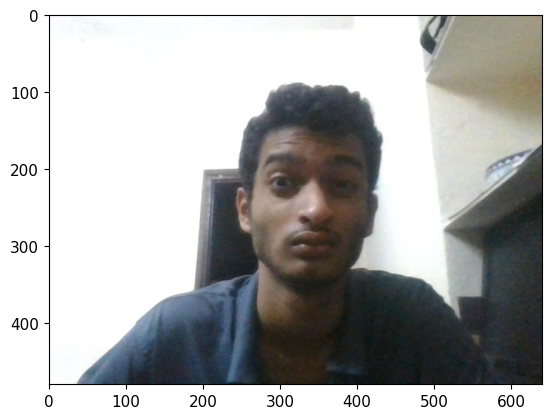

In [28]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()